In [41]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [42]:
def var_name(var):
    """Return the name of the variable based on its index."""
    if var == 0:
        return "Density"
    elif var == 1:
        return "Velocity_x"
    elif var == 2:
        return "Velocity_y"
    elif var == 3:
        return "Velocity_z"
    elif var == 4:
        return "Internal_energy"
    elif var == 5:
        return "Temperature"
    elif var == 6:
        return "Electron_density"
    elif var == 7:
        return "Hydrogen_number_density"
    elif var == 8:
        return "relative_Helium_number_density"
    elif var == 9:
        return "relative_Neutral_Hydrogen_density"
    elif var == 10:
        return "relative_Neutral_Helium_density"
    elif var == 11:
        return "relative_H+_density"
    elif var == 12:
        return "relative_He+_density"
    elif var == 13:
        return "relative_He++_density"
    elif var == 14:
        return "Magnetic_field_x"
    elif var == 15:
        return "Magnetic_field_y"
    elif var == 16:
        return "Magnetic_field_z"
    else:
        raise ValueError(f"Invalid variable index: {var}")
    
def var_name_units(var):
    """Return the name of the variable based on its index."""
    if var == 0:
        return "Density (g/cm^3)"
    elif var == 1:
        return "Velocity_x (cm/s)"
    elif var == 2:
        return "Velocity_y (cm/s)"
    elif var == 3:
        return "Velocity_z (cm/s)"
    elif var == 4:
        return "Internal_energy (erg/cm^3)"
    elif var == 5:
        return "Temperature (K)"
    elif var == 6:
        return "Electron_density (cm^-3)"
    elif var == 7:
        return "Hydrogen_number_density (cm^-3)"
    elif var == 8:
        return "Relative_helium_number_density"
    elif var == 9:
        return "Relative_Neutral_Hydrogen_density"
    elif var == 10:
        return "Relative_Neutral_Helium_density"
    elif var == 11:
        return "Relative_H+_density"
    elif var == 12:
        return "Relative_He+_density"
    elif var == 13:
        return "Relative_He++_density"
    elif var == 14:
        return "Magnetic_field_x (G)"
    elif var == 15:
        return "Magnetic_field_y (G)"
    elif var == 16:
        return "Magnetic_field_z (G)"
    else:
        raise ValueError(f"Invalid variable index: {var}")

X: [  0.          15.52487619  31.04975238  46.57462857  62.09950476
  77.62438095  93.14925714 108.67413333 124.19900952 139.72388571
 155.2487619  170.7736381  186.29851429 201.82339048 217.34826667
 232.87314286 248.39801905 263.92289524 279.44777143 294.97264762
 310.49752381 326.0224     341.54727619 357.07215238 372.59702857
 388.12190476 403.64678095 419.17165714 434.69653333 450.22140952
 465.74628571 481.2711619  496.7960381  512.32091429 527.84579048
 543.37066667 558.89554286 574.42041905 589.94529524 605.47017143
 620.99504762 636.51992381 652.0448     667.56967619 683.09455238
 698.61942857 714.14430476 729.66918095 745.19405714 760.71893333
 776.24380952 791.76868571 807.2935619  822.8184381  838.34331429
 853.86819048 869.39306667 884.91794286 900.44281905 915.96769524
 931.49257143 947.01744762 962.54232381 978.0672    ] 
, Y: [  0.          15.52487619  31.04975238  46.57462857  62.09950476
  77.62438095  93.14925714 108.67413333 124.19900952 139.72388571
 155.2487619 

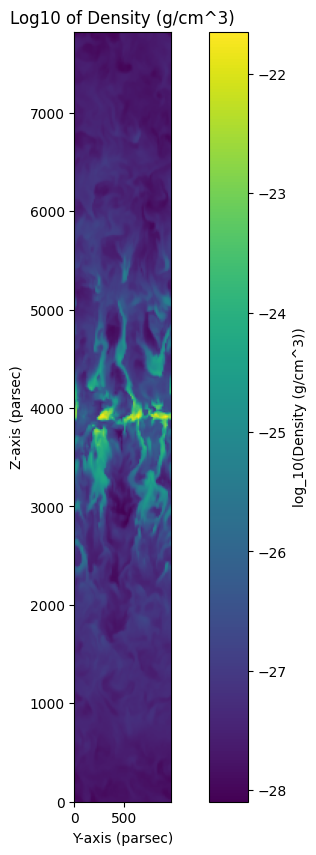

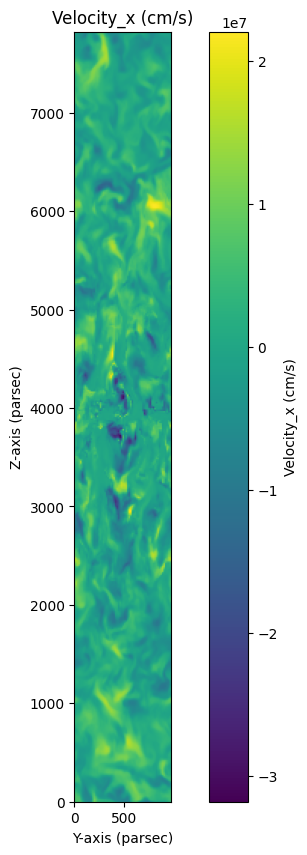

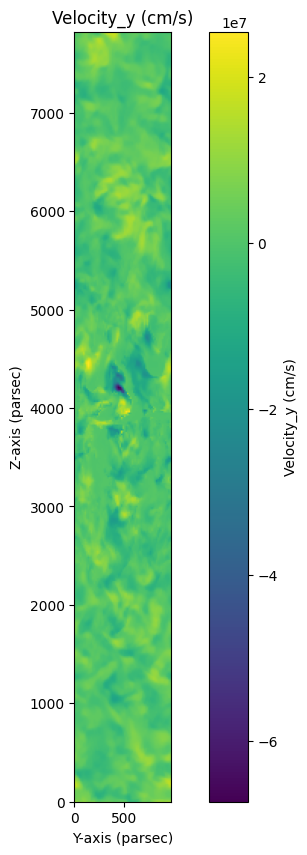

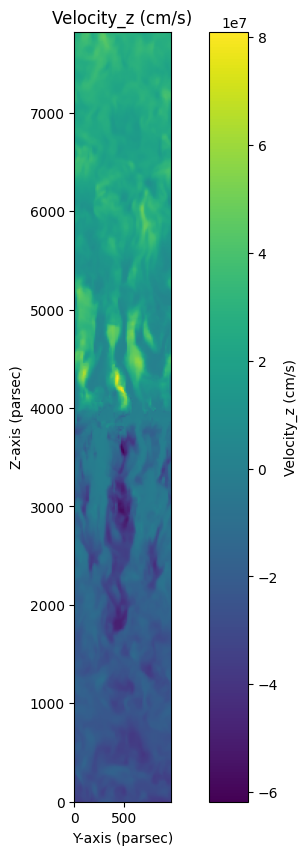

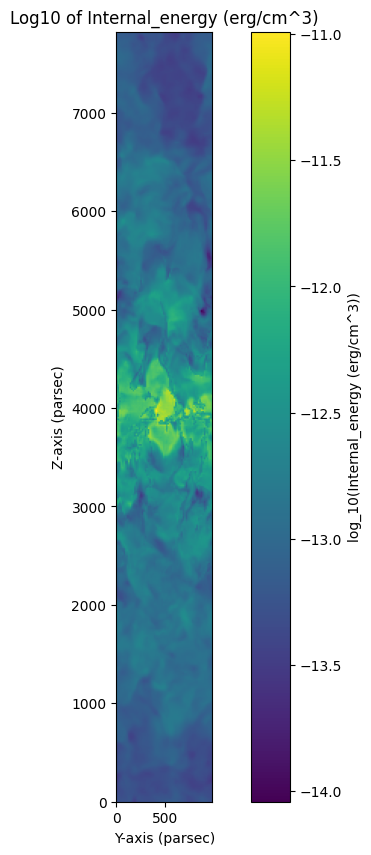

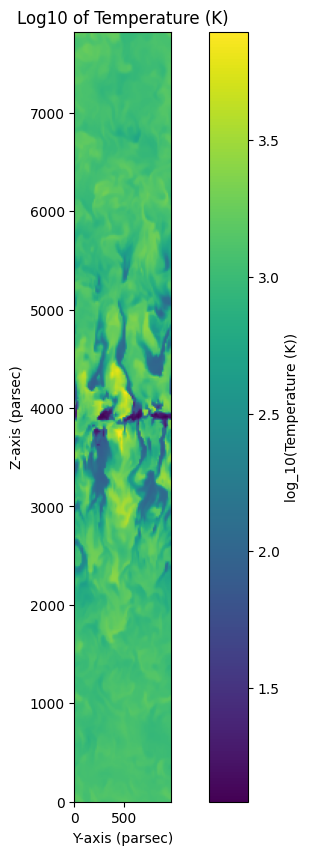

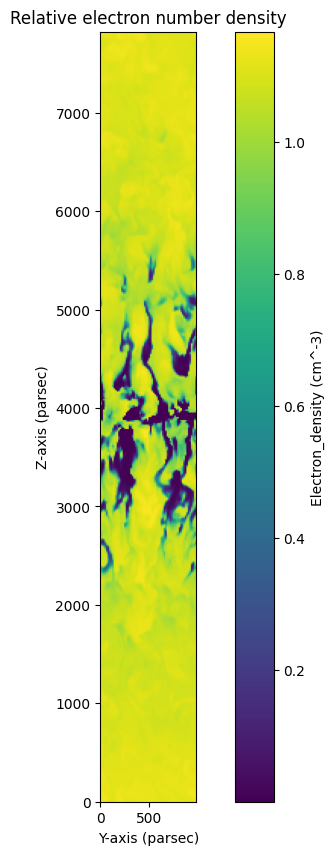

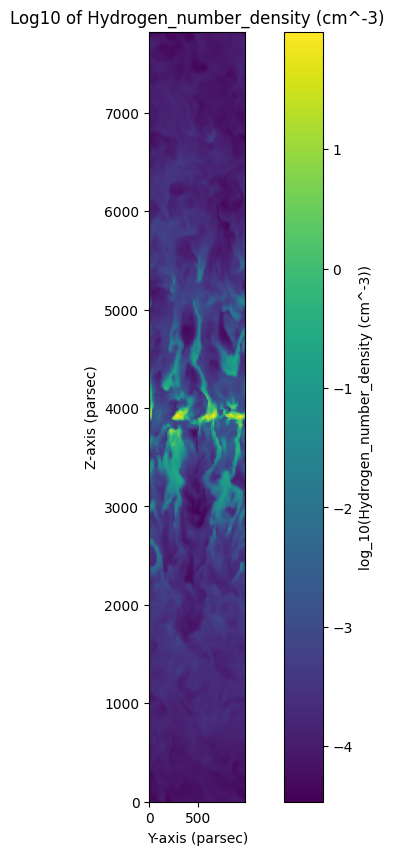

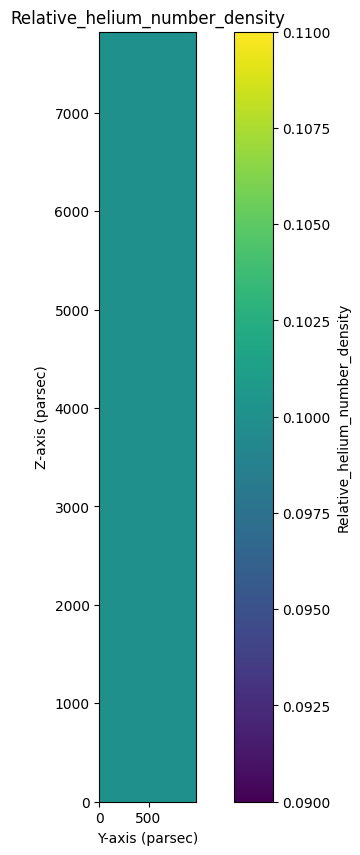

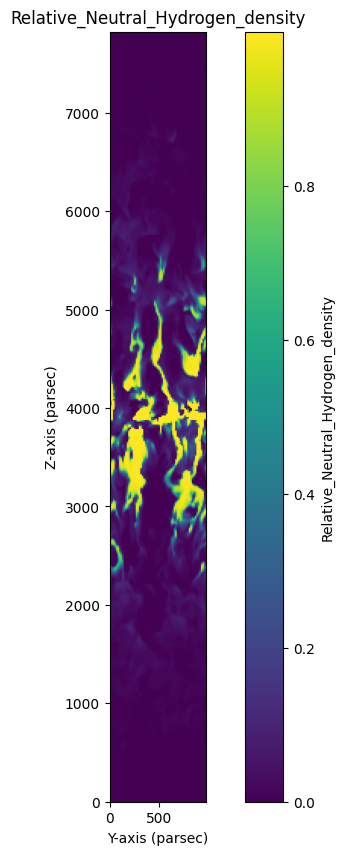

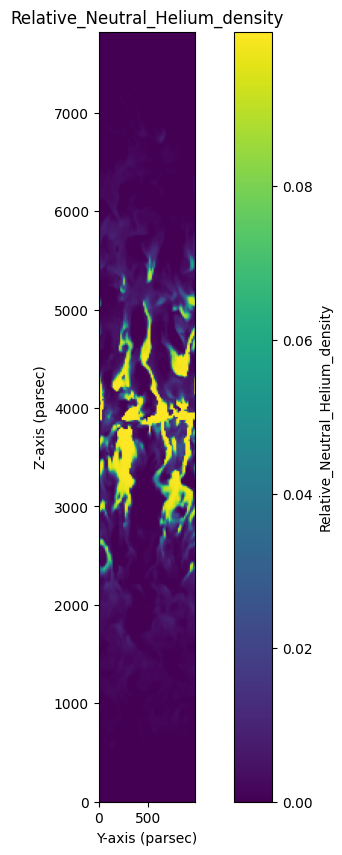

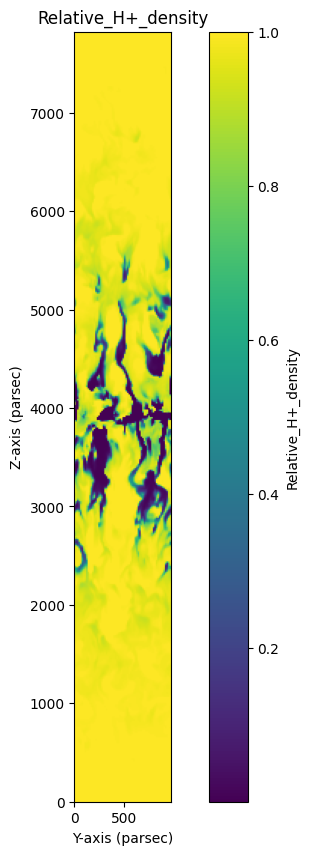

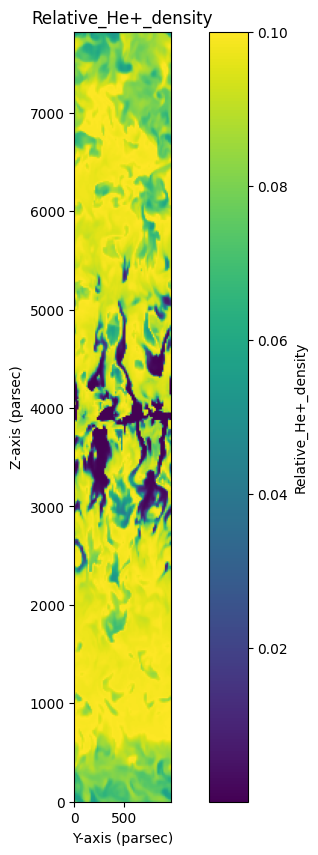

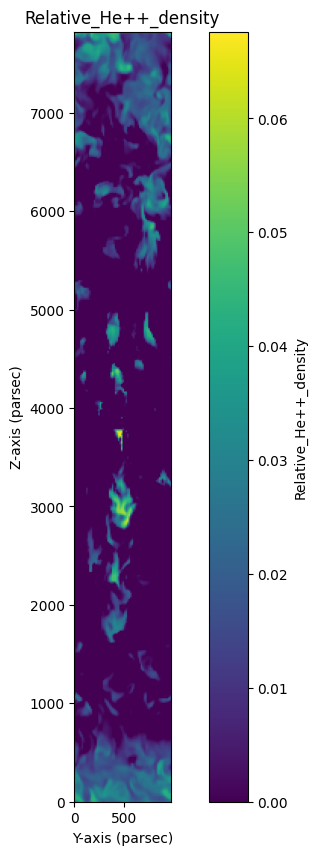

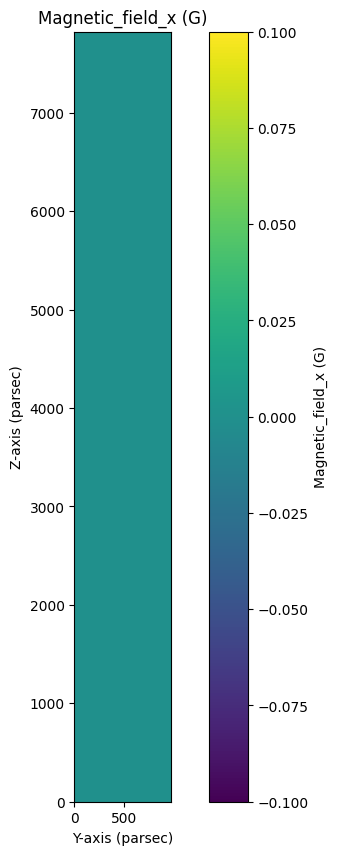

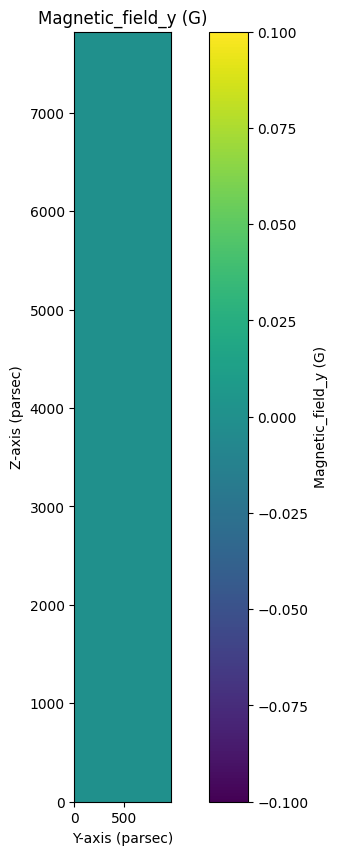

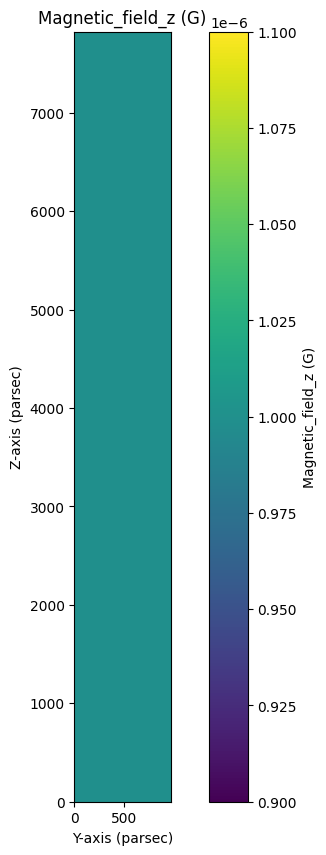

In [44]:
# Plotting the data at the slice y=32, i.e., the xz-plane
y_0 = 0
x_0 = 32
z_0 = 32
num_vars = 17
nx, ny, nz = 64, 64 , 512
plt_file= "plt80000"  # Change this to the desired plt file name
# Path to the directory containing the data files
path="/home/jay-yadav/Desktop/frt/CripticReader_2-main/"
log_var_indices = [0, 4, 5, 7] # Variables to be plotted on a logarithmic scale
cell_size_parsec = 15.2823 # Cell size in parsec
X_lo= 0
Y_lo= 0
Z_lo= 0
X_hi= cell_size_parsec * nx
Y_hi= cell_size_parsec * ny
Z_hi= cell_size_parsec * nz
# Create 3 arrays to hold the coordinates for the x, y, and z axes with each axis having the same number of points as the corresponding dimension
x = np.linspace(X_lo, X_hi, nx)
y = np.linspace(Y_lo, Y_hi, ny)
z = np.linspace(Z_lo, Z_hi, nz)

print(f"X: {x} \n, Y: {y}\n, Z: {z}\n")

# initialize empty object array of length 17 to hold 3D arrays
data = np.empty((17,), dtype=object)
i=0
while i < num_vars:
    var = i
    data[var] = np.loadtxt(path+plt_file+"_"+var_name(var)+".csv", delimiter=",")
    data[var] = data[var].reshape((nx, ny, nz))
    # Check if the data is 3D
    # print(data[var].shape)  # Show the shape of the array
    if data[var].ndim != 3:
        print(f"Data for {var_name(var)} is not 3D.")
        continue
    # check if the data is empty
    if data[var].size == 0:
        print(f"No data found for {var_name(var)}.")
        continue
    i += 1
for var in range(num_vars):
    # Check if the variable is in the log_var_indices
    if var in log_var_indices:
        # Plot on a logarithmic scale
        plt.figure(figsize=(10, 10))
        plt.xlabel("Y-axis (parsec)")
        plt.ylabel("Z-axis (parsec)")
        # Visualize a 2D slice
        plt.imshow(np.log10(data[var][x_0, :, :]).T, origin='lower', extent=[Y_lo, Y_hi, Z_lo, Z_hi])
        plt.colorbar(label="log_10(" + var_name_units(var) + ")")
        plt.title(f"Log10 of {var_name_units(var)}")
    else:
        plt.figure(figsize=(10, 10))
        # set the x axis of the plot to the y axis of the data
        plt.xlabel("Y-axis (parsec)")
        plt.ylabel("Z-axis (parsec)")
        # Visualize a 2D slice, the x-axis is the y-axis of the data with the np array Y amd the y-axis is the z-axis of the data with the np array Z
        # Let the ticks on the x-axis be the values in the numpy array y and the ticks on the y-axis be the values in the numpy array z
        plt.imshow((data[var][x_0,:, :]).T, origin='lower', extent=[Y_lo, Y_hi, Z_lo, Z_hi])
        plt.colorbar(label=var_name_units(var))
        if var==6:
            plt.title(f"Relative electron number density")
        else:
            plt.title(f"{var_name_units(var)}")

print(" All dimensionful quantities are in cgs units. These are 2D slices of the 3D data on the y-z plane at x = ", x_0*cell_size_parsec, " parsec.")
plt.show()
